In [1]:
import os
# select cuda 0
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print("CUDA available:", cuda_available)

if cuda_available:
    # Number of GPUs
    num_gpus = torch.cuda.device_count()
    print("Number of GPUs:", num_gpus)

    # List each device’s name
    for i in range(num_gpus):
        name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {name}")
else:
    print("No CUDA devices found")

CUDA available: True
Number of GPUs: 1
GPU 0: Tesla V100-PCIE-32GB


In [2]:
from buffer import DiscBuffer

buffer = DiscBuffer('/var/local/glang/activations/clt-activations-10M.h5', 'tensor')

loader = torch.utils.data.DataLoader(
    buffer,
    num_workers=20,
    prefetch_factor=10,
    batch_size=1000,
    shuffle=True,
)

In [7]:
from lightning.pytorch.loggers import WandbLogger
from clt import CrossLayerTranscoder
import lightning.pytorch as L


logger = WandbLogger(project='wandb_clt')
trainer = L.Trainer(logger=logger, max_steps=2000, limit_train_batches=2000)
trainer.fit(
    model=CrossLayerTranscoder(config={
        "d_acts": 768,
        "d_features": 768 * 8,
        "n_layers": 12,
        "bandwidth": 1.,
        "lambda": 0.0,
        "c": 0.1,
        "jump_thresh": 0.03,
        "lr": 1e-3
    }),
    train_dataloaders=loader,
)

# Save checkpoint after training
checkpoint_path = "checkpoints/clsae.ckpt"
trainer.save_checkpoint(checkpoint_path)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/var/local/glang/crosslayer-transcoder/.venv/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:397: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/var/local/glang/crosslayer-transcoder/.venv/lib/python3.12/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory ./wandb_clt/9x7hnne0/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

  | Name         | Type | Params | Mode 
----------------------------------------------
0 | relu         | ReLU | 0      | train
  | other params | n/a  | 736 M  | n/a  
----------------------------------------------
736 M     Trainable params
0         Non-trainable params
736 M     Total params
2,944.696 Total estimated model pa

Epoch 0: 100%|██████████| 2000/2000 [22:49<00:00,  1.46it/s, v_num=nne0]

`Trainer.fit` stopped: `max_steps=2000` reached.


Epoch 0: 100%|██████████| 2000/2000 [23:42<00:00,  1.41it/s, v_num=nne0]


In [4]:
# load the saved model
import torch




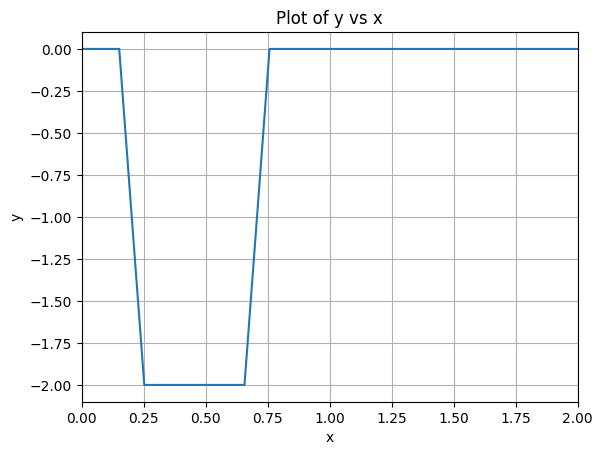

In [5]:
def K(x):
    return H(x + .5) - H(x - .5)

def H(x):
    return np.where(x > 0, np.ones_like(x), np.zeros_like(x))

def derivative(x):
    e = .5
    theta = .5
    return (-1/e) * K((x - theta) / e)

import matplotlib.pyplot as plt
import numpy as np

def plot(x, y):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of y vs x')
    plt.grid()
    plt.xlim(0, 2)
    plt.show()

x = np.linspace(-5, 5, 100)
y = derivative(x)
plot(x, y)


In [6]:
(batchsize nlayer dfeature), (nlayer dfeatures dacts) -> (batchsize nlayer dacts)


batch tolayer dacts = 

for n in fromlayer:
    for f in dfeatures:
        add acts[batch nlayers f] * W_dec[n tolayer f dacts] * mask[fromlayer tolayer]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3602769960.py, line 1)

In [ ]:
t = torch.triu(torch.ones(12, 12))
t[0, 6] = 6
t

tensor([[1., 1., 1., 1., 1., 1., 6., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
import torch

a = torch.randint(0, 10, (3, 4))
b = torch.randint(0, 10, (4, 5))
a, b

(tensor([[3, 1, 1, 7],
         [3, 6, 0, 1],
         [5, 7, 6, 2]]),
 tensor([[7, 2, 3, 1, 0],
         [3, 9, 7, 2, 6],
         [9, 4, 5, 3, 0],
         [8, 6, 3, 9, 8]]))

In [ ]:
from einops import einsum

einsum(a, b, 'a b, c d -> a b d')

tensor([[[ 81,  63,  54,  45,  42],
         [ 27,  21,  18,  15,  14],
         [ 27,  21,  18,  15,  14],
         [189, 147, 126, 105,  98]],

        [[ 81,  63,  54,  45,  42],
         [162, 126, 108,  90,  84],
         [  0,   0,   0,   0,   0],
         [ 27,  21,  18,  15,  14]],

        [[135, 105,  90,  75,  70],
         [189, 147, 126, 105,  98],
         [162, 126, 108,  90,  84],
         [ 54,  42,  36,  30,  28]]])

res[a b d] = 
    for j in range(c):
        add a[a, b] * b[c, d]

In [ ]:
torch.tril(torch.ones(12, 12))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
# make two small example tensors
x = torch.randn(2, 4, 3)
y = torch.ones(3, 4) * 2
x, y

(tensor([[[ 0.1049,  0.6891, -0.2221],
          [-0.6869, -1.8075,  1.1821],
          [ 1.9893, -0.8786,  1.2487],
          [ 0.9046,  0.4721, -0.8072]],
 
         [[ 0.4983,  0.7082,  0.0465],
          [ 0.3724,  0.8592, -0.3992],
          [-0.5043,  0.9919, -1.5528],
          [-1.2314, -0.1028,  0.0340]]]),
 tensor([[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]))

In [ ]:
x @ y

tensor([[[ 1.1438,  1.1438,  1.1438,  1.1438],
         [-2.6246, -2.6246, -2.6246, -2.6246],
         [ 4.7188,  4.7188,  4.7188,  4.7188],
         [ 1.1390,  1.1390,  1.1390,  1.1390]],

        [[ 2.5060,  2.5060,  2.5060,  2.5060],
         [ 1.6648,  1.6648,  1.6648,  1.6648],
         [-2.1303, -2.1303, -2.1303, -2.1303],
         [-2.6004, -2.6004, -2.6004, -2.6004]]])

In [ ]:
torch.matmul(x, y)

tensor([[[ 1.1438,  1.1438,  1.1438,  1.1438],
         [-2.6246, -2.6246, -2.6246, -2.6246],
         [ 4.7188,  4.7188,  4.7188,  4.7188],
         [ 1.1390,  1.1390,  1.1390,  1.1390]],

        [[ 2.5060,  2.5060,  2.5060,  2.5060],
         [ 1.6648,  1.6648,  1.6648,  1.6648],
         [-2.1303, -2.1303, -2.1303, -2.1303],
         [-2.6004, -2.6004, -2.6004, -2.6004]]])

In [ ]:
from einops import einsum

einsum(x, y, 'a b c, c d -> a b d')

tensor([[[ 1.1438,  1.1438,  1.1438,  1.1438],
         [-2.6246, -2.6246, -2.6246, -2.6246],
         [ 4.7188,  4.7188,  4.7188,  4.7188],
         [ 1.1390,  1.1390,  1.1390,  1.1390]],

        [[ 2.5060,  2.5060,  2.5060,  2.5060],
         [ 1.6648,  1.6648,  1.6648,  1.6648],
         [-2.1303, -2.1303, -2.1303, -2.1303],
         [-2.6004, -2.6004, -2.6004, -2.6004]]])